# Forecast Evaluations

In [ ]:
!python -m pip install prophet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pystan==2.19.1.1 
!pip install fbprophet 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 162 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638413 sha256=8fdc096659fc1248c82a0838587365458794373531fc724768eb84f6d999cc3a
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Classic Train/Test Split

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/jose-Prohet/train_IxoE5JN.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [ ]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [ ]:
df.columns = ['rows','ds','y']

In [ ]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

,rows,ds,y
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


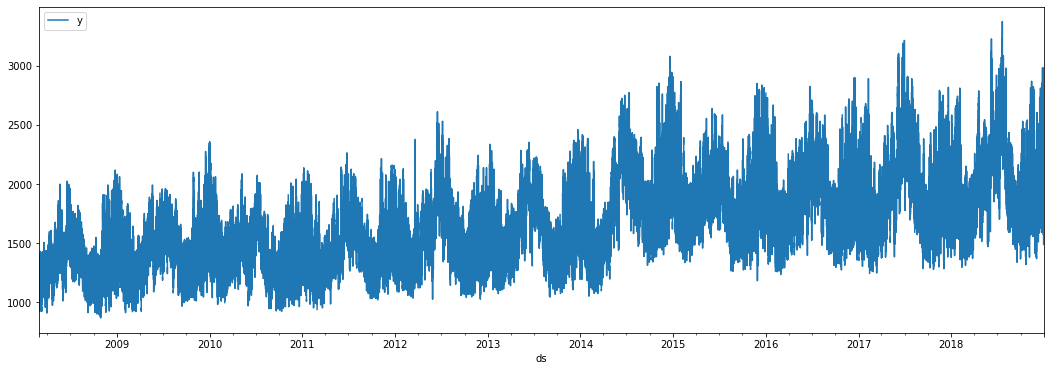

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

94992

In [ ]:
m=len(df) - 24*30*12*3

In [ ]:
train = df.iloc[:m]
test = df.iloc[m:]

In [ ]:
train.isnull().sum()

rows       0
ds         0
y       1363
dtype: int64

In [ ]:
df['y'].fillna(df['y'].mode()[0],inplace=True)

In [ ]:
train.isnull().sum()

rows    0
ds      0
y       0
dtype: int64

In [ ]:
test.isnull().sum()

rows    0
ds      0
y       0
dtype: int64

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12*3*24*30,freq='H')
forecast = m.predict(future)

In [ ]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
94987,2018-12-31 19:00:00,1530.218041,-3980.485568,7167.614542,-4289.866434,7020.237998,254.119399,254.119399,254.119399,136.347740,...,-93.193059,-93.193059,-93.193059,210.964718,210.964718,210.964718,0.0,0.0,0.0,1784.337440
94988,2018-12-31 20:00:00,1530.205585,-4052.242242,7267.554377,-4290.146287,7020.596843,273.915175,273.915175,273.915175,149.252060,...,-86.151289,-86.151289,-86.151289,210.814405,210.814405,210.814405,0.0,0.0,0.0,1804.120761
94989,2018-12-31 21:00:00,1530.193130,-4063.928364,7158.851084,-4290.426140,7020.955688,267.861028,267.861028,267.861028,136.079910,...,-78.882633,-78.882633,-78.882633,210.663750,210.663750,210.663750,0.0,0.0,0.0,1798.054158
94990,2018-12-31 22:00:00,1530.180674,-4011.257721,7127.319166,-4290.705992,7021.314533,227.672667,227.672667,227.672667,88.588961,...,-71.429053,-71.429053,-71.429053,210.512758,210.512758,210.512758,0.0,0.0,0.0,1757.853341
94991,2018-12-31 23:00:00,1530.168219,-4085.291602,7040.097330,-4290.985845,7021.673378,160.129343,160.129343,160.129343,13.601287,...,-63.833378,-63.833378,-63.833378,210.361434,210.361434,210.361434,0.0,0.0,0.0,1690.297562


In [ ]:
test.tail()

,rows,ds,y
94987,94988,2018-12-31 19:00:00,2528.4468
94988,94989,2018-12-31 20:00:00,2461.8836
94989,94990,2018-12-31 21:00:00,2365.9944
94990,94991,2018-12-31 22:00:00,2342.9428
94991,94992,2018-12-31 23:00:00,2180.2176


[Info on ax= parameter](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)

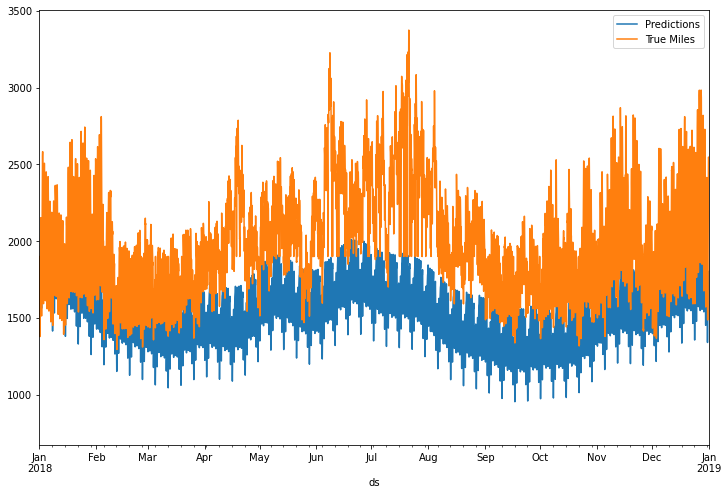

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-24*30*12*3:]['yhat']

In [ ]:
predictions

69072    1903.453761
69073    1818.765085
69074    1752.017677
69075    1710.107474
69076    1698.521730
            ...     
94987    1784.337440
94988    1804.120761
94989    1798.054158
94990    1757.853341
94991    1690.297562
Name: yhat, Length: 25920, dtype: float64

In [ ]:
test['y']

69072    1723.8754
69073    1596.2986
69074    1510.5142
69075    1477.5202
69076    1435.8500
           ...    
94987    2528.4468
94988    2461.8836
94989    2365.9944
94990    2342.9428
94991    2180.2176
Name: y, Length: 25920, dtype: float64

In [ ]:
rmse(predictions,test['y'])

393.59265768635703

In [ ]:
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/RE_MEDICATION-Interaction-Cousera/sub_sample.csv')

In [ ]:
submission

,row_id,energy
0,94993,1702.995014
1,94994,1702.995014
2,94995,1702.995014
3,94996,1702.995014
4,94997,1702.995014
...,...,...
26299,121292,1702.995014
26300,121293,1702.995014
26301,121294,1702.995014
26302,121295,1702.995014


In [ ]:
submission['energy']=forecast.yhat

In [ ]:
submission

,row_id,energy
0,94993,1230.575579
1,94994,1150.252159
2,94995,1087.975734
3,94996,1050.617261
4,94997,1043.635762
...,...,...
26299,121292,1489.930708
26300,121293,1505.334639
26301,121294,1494.265845
26302,121295,1448.491622


In [ ]:
pd.DataFrame(submission,columns=['row_id','energy']).to_csv('/content/drive/MyDrive/Colab Notebooks/jose-Prohet/result4.csv',index=False)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

result = np.sqrt(mean_squared_error(predictions,test['y']))
    


print(' mean_sqaures_error...{}'.format(mean_squared_error(predictions,test['y'])))
print('square root of mean_sqaured_error...{}'.format(result))

 mean_sqaures_error...154915.1801846098
square root of mean_sqaured_error...393.59265768635703
